# MMOCR Tutorial

Welcome to MMOCR! This is the official colab tutorial for using MMOCR. In this tutorial, you will learn how to

- Perform inference with a pretrained text recognizer
- Perform inference with a pretrained text detector
- Perform end-to-end OCR with pretrained recognizer and detector
- Combine OCR with downstream tasks
- Perform inference with a pretrained Key Information Extraction (KIE) model
- Train a text recognizer with a toy dataset

Let's start!

## Install MMOCR

When installing dependencies for mmocr, please ensure that all the dependency versions are compatible with each other. For instance, if CUDA 10.1 is installed, then the Pytorch version must be compatible with cu10.1. Please see [getting_started.md](docs/getting_started.md) for more details. 

In [1]:
%cd ..

/


### Check PyTorch version

In [3]:
!pip show torch


Name: torch
Version: 1.10.0+cu111
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.7/dist-packages
Requires: typing-extensions
Required-by: torchvision, torchtext, torchaudio, fastai


### Install Dependencies 

In [4]:
# Install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# Install mmdetection
!pip install mmdet

# Install mmocr
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -r requirements.txt
!pip install -v -e .

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 46.0 MB 50.2 MB/s 
     |████████████████████████████████| 190 kB 3.9 MB/s 
     |████████████████████████████████| 1.3 MB 4.1 MB/s 
Cloning into 'mmocr'...
remote: Enumerating objects: 5670, done.
remote: Counting objects: 100% (560/560), done.
remote: Compressing objects: 100% (375/375), done.
remote: Total 5670 (delta 252), reused 381 (delta 177), pack-reused 5110
Receiving objects: 100% (5670/5670), 12.35 MiB | 14.10 MiB/s, done.
Resolving deltas: 100% (3360/3360), done.
/mmocr
     |████████████████████████████████| 603 kB 4.4 MB/s 
     |████████████████████████████████| 102 kB 49.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47.6 MB 2.2 MB/s 
     |████████████████████████████████| 1.6 MB 38.8 MB/s 
     |██████████████████████

### Check Installed Dependencies Versions

In [5]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check mmocr installation
import mmocr
print(mmocr.__version__)

%cd /mmocr/
!ls

1.10.0+cu111 True
2.22.0
1.4.6
11.1
GCC 7.3
0.4.1
/mmocr
CITATION.cff  docs	   mmocr.egg-info   requirements      setup.py
configs       LICENSE	   model-index.yml  requirements.txt  tests
demo	      MANIFEST.in  README.md	    resources	      tools
docker	      mmocr	   README_zh-CN.md  setup.cfg


# Inference

We provide an easy-to-use inference script, `mmocr/utils/ocr.py`, that can be either called through command line or imported as an object (the `MMOCR` class inside). In this notebook, we choose the latter option for ease of demonstration. You can check out its full usage and examples in our [official documentation](https://mmocr.readthedocs.io/en/latest/demo.html).

## Perform Inference with a Pretrained Text Recognizer 

We now demonstrate how to inference on a [demo text recognition image](https://github.com/open-mmlab/mmocr/raw/main/demo/demo_text_recog.jpg) with a pretrained text recognizer using command line. SAR text recognizer is used for this demo, whose checkpoint can be found in the [official documentation](https://mmocr.readthedocs.io/en/latest/textrecog_models.html#show-attend-and-read-a-simple-and-strong-baseline-for-irregular-text-recognition). But you don't need to download it manually -- Our inference script handles these cumbersome setup steps for you! 

Run the following command and the recognition result will be saved to `outputs/demo_text_recog_pred.jpg`. We will visualize the result in the end.

In [6]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det=None, recog='SAR')
mmocr.readtext('demo/demo_text_recog.jpg', print_result=True, output='outputs/demo_text_recog_pred.jpg')

/usr/local/lib/python3.7/dist-packages/mmdet/datasets/pipelines/formating.py:7: UserWarning: DeprecationWarning: mmdet.datasets.pipelines.formating will be deprecated, please replace it with mmdet.datasets.pipelines.formatting.
  warnings.warn('DeprecationWarning: mmdet.datasets.pipelines.formating will be '


load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


Downloading: "https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth" to /root/.cache/torch/hub/checkpoints/sar_r31_parallel_decoder_academic-dba3a4a3.pth


  0%|          | 0.00/219M [00:00<?, ?B/s]

/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


{'text': 'STAR', 'score': 0.9664110243320465}



[{'score': 0.9664110243320465, 'text': 'STAR'}]

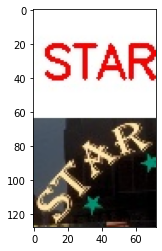

In [7]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_recog_pred.jpg')
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform Inference with a Pretrained Text Detector 

Next, we perform inference with a pretrained TextSnake text detector and visualize the bounding box results for the demo text detection image provided in [demo_text_det.jpg](https://raw.githubusercontent.com/open-mmlab/mmocr/main/demo/demo_text_det.jpg).

In [8]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='TextSnake', recog=None)
_ = mmocr.readtext('demo/demo_text_det.jpg', output='outputs/demo_text_det_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


Downloading: "https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth" to /root/.cache/torch/hub/checkpoints/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth


  0%|          | 0.00/139M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)


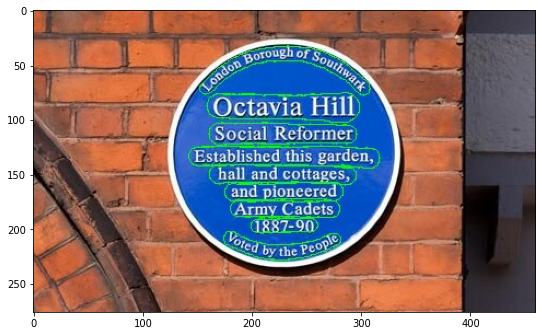

In [9]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_det_pred.jpg')
plt.figure(figsize=(9, 16))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform end-to-end OCR with pretrained recognizer and detector

With the help of `ocr.py`, we can easily combine any text detector and recognizer into a pipeline that forms a standard OCR step. Now we build our own OCR pipeline with TextSnake and SAR and apply it to [demo_text_ocr.jpg](https://raw.githubusercontent.com/open-mmlab/mmocr/main/demo/demo_text_ocr.jpg).

In [10]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='TextSnake', recog='SAR')
mmocr.readtext('demo/demo_text_ocr.jpg', print_result=True, output='outputs/demo_text_ocr_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)


{'filename': 'demo_text_ocr', 'text': ['OCBCBANK', 'soculationists', 'sanetal.enance.ounces', '70%', 'ROUND', 'SALE', 'ALLYEAR', 'is', 'SALE']}



[{'filename': 'demo_text_ocr',
  'text': ['OCBCBANK',
   'soculationists',
   'sanetal.enance.ounces',
   '70%',
   'ROUND',
   'SALE',
   'ALLYEAR',
   'is',
   'SALE']}]

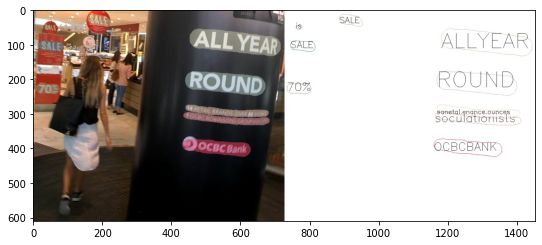

In [11]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_text_ocr_pred.jpg')
plt.figure(figsize=(9, 16))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Combine OCR with Downstream Tasks

MMOCR also supports downstream tasks of OCR, such as key information extraction (KIE). We can even add a KIE model, SDMG-R, to the pipeline applied to [demo_kie.jpeg](https://raw.githubusercontent.com/open-mmlab/mmocr/main/demo/demo_kie.jpeg) and visualize its prediction based on the OCR result.


In [12]:
# SDMGR relies on the dictionary provided in wildreceipt
# First download the KIE dataset .tar file and extract it to ./data
!mkdir data
!wget https://download.openmmlab.com/mmocr/data/wildreceipt.tar
!tar -xf wildreceipt.tar 
!mv wildreceipt ./data

--2022-03-18 07:02:24--  https://download.openmmlab.com/mmocr/data/wildreceipt.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185323520 (177M) [application/x-tar]
Saving to: ‘wildreceipt.tar’

wildreceipt.tar     100%[===================>] 176.74M  6.76MB/s    in 23s     

2022-03-18 07:02:49 (7.55 MB/s) - ‘wildreceipt.tar’ saved [185323520/185323520]



In [13]:
from mmocr.utils.ocr import MMOCR
mmocr = MMOCR(det='TextSnake', recog='SAR', kie='SDMGR')
mmocr.readtext('demo/demo_kie.jpeg', print_result=True, output='outputs/demo_kie_pred.jpg')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
Downloading: "https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth" to /root/.cache/torch/hub/checkpoints/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth


load checkpoint from http path: https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210520-7489e6de.pth


  0%|          | 0.00/18.4M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)
/mmocr/mmocr/datasets/kie_dataset.py:46: UserWarning: KIEDataset is only initialized as a downstream demo task of text detection and recognition without an annotation file.
  'without an annotation file.', UserWarning)
/mm

{'filename': 'demo_kie', 'text': ['Appraval:052723', 'Acct:Xexexxx8425', '128.27', 'Master', '128.27', 'Total', 'Tax', '11.02', '117.25', 'subTotal', 'Cheese', '10.47', '3.Perreroni', '11.07', '3Supreme', '11.97', '26', '43.94', '0.00', '12.Crunchy.Taco', '10.00', 'SLACOMPARTY', '0.00', '12SFTTACO', '10.00', 'SFtt.Tac.Party.', '0.00', 'MONODELONS', '0.00', '10.Bean', 'Grande', '9.90', 'Beatean', '0.00', 'grande', '9.90', '0rder-113533', 'Cashier:.Eric', '7/30/2012', '8:27:32', '=Article-I.D.:']}



[{'filename': 'demo_kie',
  'text': ['Appraval:052723',
   'Acct:Xexexxx8425',
   '128.27',
   'Master',
   '128.27',
   'Total',
   'Tax',
   '11.02',
   '117.25',
   'subTotal',
   'Cheese',
   '10.47',
   '3.Perreroni',
   '11.07',
   '3Supreme',
   '11.97',
   '26',
   '43.94',
   '0.00',
   '12.Crunchy.Taco',
   '10.00',
   'SLACOMPARTY',
   '0.00',
   '12SFTTACO',
   '10.00',
   'SFtt.Tac.Party.',
   '0.00',
   'MONODELONS',
   '0.00',
   '10.Bean',
   'Grande',
   '9.90',
   'Beatean',
   '0.00',
   'grande',
   '9.90',
   '0rder-113533',
   'Cashier:.Eric',
   '7/30/2012',
   '8:27:32',
   '=Article-I.D.:']}]

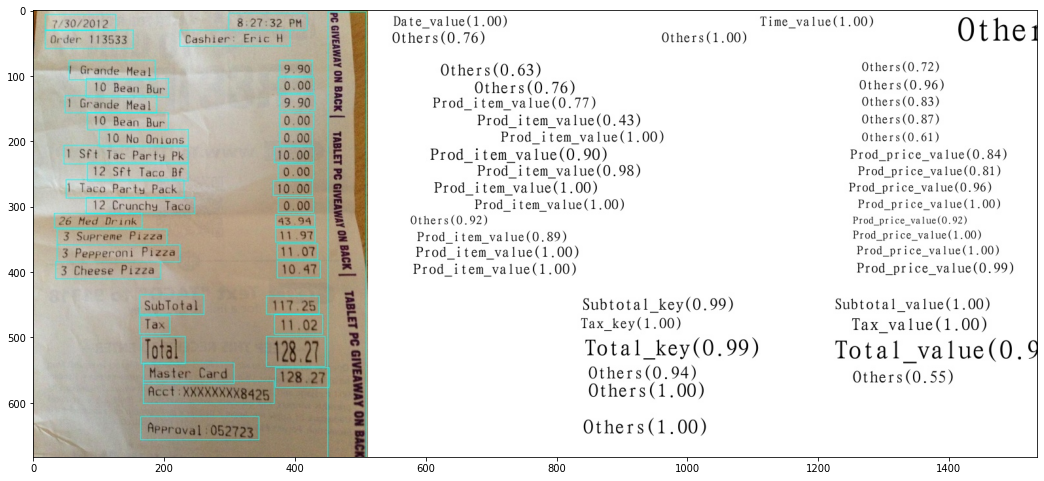

In [14]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/demo_kie_pred.jpg')
plt.figure(figsize=(18, 32))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

## Perform Testing with a Pretrained KIE Model

We perform testing on the WildReceipt dataset for KIE model by first downloading the .tar file from [Datasets Preparation](https://mmocr.readthedocs.io/en/latest/datasets.html) in MMOCR documentation and then extract the dataset. We have chosen the Visual + Textual moduality test dataset, which we evaluate with Macro F1 metrics.

In [15]:
# Can skip this step if you have downloaded wildreceipt in the last section
# Download the KIE dataset .tar file and extract it to ./data
!mkdir data
!wget https://download.openmmlab.com/mmocr/data/wildreceipt.tar
!tar -xf wildreceipt.tar 
!mv wildreceipt ./data

mkdir: cannot create directory ‘data’: File exists
--2022-03-18 07:03:33--  https://download.openmmlab.com/mmocr/data/wildreceipt.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.18
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185323520 (177M) [application/x-tar]
Saving to: ‘wildreceipt.tar.1’

wildreceipt.tar.1   100%[===================>] 176.74M  6.24MB/s    in 20s     

2022-03-18 07:03:54 (8.90 MB/s) - ‘wildreceipt.tar.1’ saved [185323520/185323520]

mv: cannot move 'wildreceipt' to './data/wildreceipt': Directory not empty


In [16]:
# Test the dataset with macro f1 metrics 
!python tools/test.py configs/kie/sdmgr/sdmgr_unet16_60e_wildreceipt.py https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt_20210405-16a47642.pth --eval macro_f1

/usr/local/lib/python3.7/dist-packages/mmdet/datasets/pipelines/formating.py:7: UserWarning: DeprecationWarning: mmdet.datasets.pipelines.formating will be deprecated, please replace it with mmdet.datasets.pipelines.formatting.
  warnings.warn('DeprecationWarning: mmdet.datasets.pipelines.formating will be '
/mmocr/mmocr/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/mmocr/mmocr/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
/mmocr/mmocr/datasets/utils/loader.py:

## Perform Training on a Toy Dataset with MMOCR Recognizer
We now demonstrate how to perform training with an MMOCR recognizer. Since training a full academic dataset is time consuming (usually takes about several hours), we will train on the toy dataset for the SAR text recognition model and visualize the predictions. Text detection and other downstream tasks such as KIE follow similar procedures.

Training a dataset usually consists of the following steps:
1. Convert the dataset into a format supported by MMOCR (e.g. COCO for text detection). The annotation file can be in either .txt or .lmdb format, depending on the size of the dataset. This step is usually applicable to customized datasets, since the datasets and annotation files we provide are already in supported formats. 
2. Modify the config for training. 
3. Train the model. 

The toy dataset consisits of ten images as well as annotation files in both txt and lmdb format, which can be found in [ocr_toy_dataset](https://github.com/open-mmlab/mmocr/tree/main/tests/data/toy_dataset). 

### Visualize the Toy Dataset

We first get a sense of what the toy dataset looks like by visualizing one of the images and labels. 

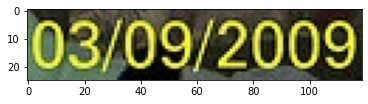

In [17]:
import mmcv
import matplotlib.pyplot as plt 

img = mmcv.imread('./tests/data/ocr_toy_dataset/imgs/1036169.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [18]:
# Inspect the labels of the annootation file
!cat tests/data/ocr_toy_dataset/label.txt

1223731.jpg GRAND
1223733.jpg HOTEL
1223732.jpg HOTEL
1223729.jpg PACIFIC
1036169.jpg 03/09/2009
1190237.jpg ANING
1058891.jpg Virgin
1058892.jpg america
1240078.jpg ATTACK
1210236.jpg DAVIDSON


### Modify the Configuration File

In order to perform inference for SAR on colab, we need to modify the config file to accommodate some of the settings of colab such as the number of GPU available. 

In [19]:
from mmcv import Config
cfg = Config.fromfile('./configs/textrecog/sar/sar_r31_parallel_decoder_toy_dataset.py')

In [20]:
from mmdet.apis import set_random_seed

# Set up working dir to save files and logs.
cfg.work_dir = './demo/tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.001 / 8
cfg.lr_config.warmup = None
# Choose to log training results every 40 images to reduce the size of log file. 
cfg.log_config.interval = 40

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=40, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
label_convertor = dict(
    type='AttnConvertor', dict_type='DICT90', with_unknown=True)
model = dict(
    type='SARNet',
    backbone=dict(type='ResNet31OCR'),
    encoder=dict(
        type='SAREncoder', enc_bi_rnn=False, enc_do_rnn=0.1, enc_gru=False),
    decoder=dict(
        type='ParallelSARDecoder',
        enc_bi_rnn=False,
        dec_bi_rnn=False,
        dec_do_rnn=0,
        dec_gru=False,
        pred_dropout=0.1,
        d_k=512,
        pred_concat=True),
    loss=dict(type='SARLoss'),
    label_convertor=dict(
        type='AttnConvertor', dict_type='DICT90', with_unknown=True),
    max_seq_len=30)
optimizer = dict(type='Adam', lr=0.000125)
optimizer_config = dict(grad_clip=None)
lr_config = dict(

### Train the SAR Text Recognizer 
Finally, we train the SAR text recognizer on the toy dataset for five epochs. 

In [21]:
from mmocr.datasets import build_dataset
from mmocr.models import build_detector
from mmocr.apis import train_detector
import os.path as osp

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/mmocr/mmocr/datasets/utils/loader.py:86: UserWarning: HardDiskLoader is deprecated, please use AnnFileLoader instead.
  'AnnFileLoader instead.', UserWarning)
/mmocr/mmocr/datasets/utils/loader.py:102: UserWarning: LmdbLoader is deprecated, please use AnnFileLoader instead.
  'AnnFileLoader instead.', UserWarning)
/mmocr/mmocr/apis/train.py:86: UserWarning: config is now expected to have a `runner` section, please set `runner` in your config.
  'please set `runner` in your config.', UserWarning)
/mmocr/mmocr/apis/utils.py:53: UserWarning: Remove "MultiRotateAugOCR" to support batch inference since samples_per_gpu > 1.
  warnings.warn(warning_msg)
/mmocr/mmocr/datasets/utils/loader.py:102: UserWarning: LmdbLoader is deprecated, please use AnnFileLoader instead.
  'AnnFileLoader instead.', UserWarning)
2022-03-18 07:04:53,221 - mmocr - INFO - Start running, host: root@366f3a61a508, work_dir: /mmocr/demo/tutorial_exps
2022-03-18 07:04:53,223 - mmocr - INFO - Hooks will be executed in the

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 4.5 task/s, elapsed: 2s, ETA:     0s

2022-03-18 07:07:38,433 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-03-18 07:07:38,442 - mmocr - INFO - Epoch(val) [1][2]	0_word_acc: 0.8000, 0_word_acc_ignore_case: 0.8000, 0_word_acc_ignore_case_symbol: 0.8000, 0_char_recall: 0.8065, 0_char_precision: 0.8333, 0_1-N.E.D: 0.8000
2022-03-18 07:08:05,298 - mmocr - INFO - Epoch [2][40/250]	lr: 1.250e-04, eta: 0:09:52, time: 0.670, data_time: 0.055, memory: 2142, loss_ce: 0.4700, loss: 0.4700
2022-03-18 07:08:30,055 - mmocr - INFO - Epoch [2][80/250]	lr: 1.250e-04, eta: 0:09:28, time: 0.619, data_time: 0.004, memory: 2142, loss_ce: 0.3754, loss: 0.3754
2022-03-18 07:08:54,819 - mmocr - INFO - Epoch [2][120/250]	lr: 1.250e-04, eta: 0:09:03, time: 0.619, data_time: 0.004, memory: 2142, loss_ce: 0.3414, loss: 0.3414
2022-03-18 07:09:19,594 - mmocr - INFO - Epoch [2][160/250]	lr: 1.250e-04, eta: 0:08:38, time: 0.619, data_time: 0.004, memory: 2142, loss_ce: 0.2869, loss: 0.2869
2022-03-18 07:09:4

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 4.5 task/s, elapsed: 2s, ETA:     0s

2022-03-18 07:10:22,071 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-03-18 07:10:22,075 - mmocr - INFO - Epoch(val) [2][2]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000
2022-03-18 07:10:49,081 - mmocr - INFO - Epoch [3][40/250]	lr: 1.250e-04, eta: 0:07:14, time: 0.673, data_time: 0.055, memory: 2142, loss_ce: 0.2701, loss: 0.2701
2022-03-18 07:11:13,908 - mmocr - INFO - Epoch [3][80/250]	lr: 1.250e-04, eta: 0:06:50, time: 0.621, data_time: 0.004, memory: 2142, loss_ce: 0.2601, loss: 0.2601
2022-03-18 07:11:38,740 - mmocr - INFO - Epoch [3][120/250]	lr: 1.250e-04, eta: 0:06:25, time: 0.621, data_time: 0.004, memory: 2142, loss_ce: 0.2371, loss: 0.2371
2022-03-18 07:12:03,599 - mmocr - INFO - Epoch [3][160/250]	lr: 1.250e-04, eta: 0:06:01, time: 0.621, data_time: 0.004, memory: 2142, loss_ce: 0.2534, loss: 0.2534
2022-03-18 07:12:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 4.4 task/s, elapsed: 2s, ETA:     0s

2022-03-18 07:13:05,910 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-03-18 07:13:05,916 - mmocr - INFO - Epoch(val) [3][2]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000
2022-03-18 07:13:32,892 - mmocr - INFO - Epoch [4][40/250]	lr: 1.250e-05, eta: 0:04:40, time: 0.673, data_time: 0.055, memory: 2142, loss_ce: 0.2443, loss: 0.2443
2022-03-18 07:13:57,706 - mmocr - INFO - Epoch [4][80/250]	lr: 1.250e-05, eta: 0:04:16, time: 0.620, data_time: 0.003, memory: 2142, loss_ce: 0.2277, loss: 0.2277
2022-03-18 07:14:22,555 - mmocr - INFO - Epoch [4][120/250]	lr: 1.250e-05, eta: 0:03:51, time: 0.621, data_time: 0.004, memory: 2142, loss_ce: 0.2369, loss: 0.2369
2022-03-18 07:14:47,388 - mmocr - INFO - Epoch [4][160/250]	lr: 1.250e-05, eta: 0:03:27, time: 0.621, data_time: 0.004, memory: 2142, loss_ce: 0.2539, loss: 0.2539
2022-03-18 07:15:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 4.5 task/s, elapsed: 2s, ETA:     0s

2022-03-18 07:15:49,687 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-03-18 07:15:49,689 - mmocr - INFO - Epoch(val) [4][2]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000
2022-03-18 07:16:16,654 - mmocr - INFO - Epoch [5][40/250]	lr: 1.250e-06, eta: 0:02:07, time: 0.672, data_time: 0.055, memory: 2142, loss_ce: 0.2473, loss: 0.2473
2022-03-18 07:16:41,500 - mmocr - INFO - Epoch [5][80/250]	lr: 1.250e-06, eta: 0:01:43, time: 0.621, data_time: 0.004, memory: 2142, loss_ce: 0.2186, loss: 0.2186
2022-03-18 07:17:06,303 - mmocr - INFO - Epoch [5][120/250]	lr: 1.250e-06, eta: 0:01:19, time: 0.620, data_time: 0.004, memory: 2142, loss_ce: 0.2392, loss: 0.2392
2022-03-18 07:17:31,166 - mmocr - INFO - Epoch [5][160/250]	lr: 1.250e-06, eta: 0:00:54, time: 0.622, data_time: 0.004, memory: 2142, loss_ce: 0.2261, loss: 0.2261
2022-03-18 07:17:5

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 10/10, 4.5 task/s, elapsed: 2s, ETA:     0s

2022-03-18 07:18:33,784 - mmocr - INFO - 
Evaluateing tests/data/ocr_toy_dataset/label.lmdb with 10 images now
2022-03-18 07:18:33,787 - mmocr - INFO - Epoch(val) [5][2]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000


### Test and Visualize the Predictions

For completeness, we also perform testing on the latest checkpoint and evaluate the results with hmean-iou metrics. The predictions are saved in the ./outputs file. 

In [22]:
from mmocr.apis import init_detector, model_inference

img = './tests/data/ocr_toy_dataset/imgs/1036169.jpg'
checkpoint = "./demo/tutorial_exps/epoch_5.pth"
out_file = 'outputs/1036169.jpg'

model = init_detector(cfg, checkpoint, device="cuda:0")
if model.cfg.data.test['type'] == 'ConcatDataset':
    model.cfg.data.test.pipeline = model.cfg.data.test['datasets'][0].pipeline


result = model_inference(model, img)
print(f'result: {result}')

img = model.show_result(
        img, result, out_file=out_file, show=False)

mmcv.imwrite(img, out_file)

load checkpoint from local path: ./demo/tutorial_exps/epoch_5.pth
result: {'text': '03/09/2009', 'score': 0.9990636646747589}


True

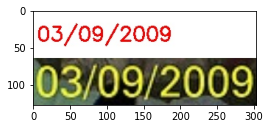

In [23]:
# Visualize the results
predicted_img = mmcv.imread('./outputs/1036169.jpg')
plt.figure(figsize=(4, 4))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()